In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn import tree

In [8]:
import pickle

In [15]:
from unidecode import unidecode

In [83]:
from sklearn import linear_model

In [5]:
local = pd.read_csv("../data/states/local.csv")

In [6]:
federal = pd.read_csv("../data/states/federal.csv")

## Amount and variability together

In [92]:
federal.columns

Index(['state', 'very_high_r', 'very_low_r', 'single_bid', 'file_size',
       'person', 'contract_duration', 'daily_price', 'same_state', 'amount',
       'variation', 'variation_s', 'c_very_high_r', 'c_low_r', 'e_exp_r',
       'code', 'var_amount'],
      dtype='object')

In [93]:
train_f = federal[['variation',
                   'variation_s',
                   'amount',
                   'single_bid',
                   'file_size',
                   'person',
                   'very_high_r']]

In [94]:
X, y = train_f.drop('very_high_r', axis=1).values, train_f['very_high_r'].values

In [95]:
ols = linear_model.LinearRegression()
ols.fit(X, y)

LinearRegression()

In [96]:
ols.coef_

array([-4.48650100e+04,  1.33355796e+04,  1.05462072e-04,  1.55262387e+01,
        2.19236502e-01,  5.14675446e+00])

In [100]:
federal['var_amount'] = (ols.coef_[0] * federal['variation'] +
                         ols.coef_[1] * federal['variation_s'] +
                         ols.coef_[2] * federal['amount'] +
                         ols.coef_[3] * federal['single_bid'] +
                         ols.coef_[4] * federal['file_size'] +
                         ols.coef_[5] * federal['person'])

In [103]:
federal.corr(method='pearson')

,very_high_r,very_low_r,single_bid,file_size,person,contract_duration,daily_price,same_state,amount,variation,variation_s,c_very_high_r,c_low_r,e_exp_r,var_amount
very_high_r,1.000000,-0.576909,0.211702,0.158444,-0.000814,-0.210743,0.071124,0.241425,0.384623,-0.507584,-0.328799,0.717764,-0.482297,0.399568,0.667852
very_low_r,-0.576909,1.000000,-0.142600,-0.071038,-0.137776,0.076133,-0.058770,-0.369632,-0.314936,0.314617,0.233265,-0.703466,0.525761,-0.116780,-0.456056
single_bid,0.211702,-0.142600,1.000000,0.142081,-0.081702,-0.492857,-0.084036,0.154874,-0.164010,-0.402719,-0.435569,0.181580,-0.092560,-0.017234,0.316989
file_size,0.158444,-0.071038,0.142081,1.000000,-0.288652,-0.309771,-0.021444,-0.187809,-0.264751,-0.197264,-0.085107,0.186048,0.024914,0.217873,0.237244
person,-0.000814,-0.137776,-0.081702,-0.288652,1.000000,0.121637,0.044044,0.144027,0.038982,0.098257,0.343860,0.075545,-0.142000,-0.112440,-0.001218
contract_duration,-0.210743,0.076133,-0.492857,-0.309771,0.121637,1.000000,0.254997,0.019553,0.253590,0.626075,0.344275,-0.020633,-0.142452,-0.169390,-0.425334
daily_price,0.071124,-0.058770,-0.084036,-0.021444,0.044044,0.254997,1.000000,-0.034270,0.436287,0.162062,0.255551,0.048458,-0.090916,-0.117548,0.212949
same_state,0.241425,-0.369632,0.154874,-0.187809,0.144027,0.019553,-0.034270,1.000000,0.264586,-0.320424,-0.387260,0.417301,-0.487391,0.090716,0.315213
amount,0.384623,-0.314936,-0.164010,-0.264751,0.038982,0.253590,0.436287,0.264586,1.000000,-0.037006,-0.081911,0.370222,-0.364302,0.457601,0.575910
variation,-0.507584,0.314617,-0.402719,-0.197264,0.098257,0.626075,0.162062,-0.320424,-0.037006,1.000000,0.773432,-0.326842,0.149603,-0.155543,-0.760025


## Add states codes to table

In [9]:
with open('/home/rdora/declaranet/data/pickle/entidades_federativas.p', 'rb') as f:
    state2code = pickle.load(f)

In [16]:
states = sorted(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'], key=lambda x: unidecode(x))

In [19]:
codes = list(zip(*sorted(state2code.items(), key=lambda x: x[0])))[1]
code2state = dict(zip(states, codes))

In [21]:
code2state = {state: val[3:] for state, val in code2state.items()}

In [24]:
local['code'] = local.state.replace(code2state)

In [25]:
federal['code'] = federal.state.replace(code2state)

In [29]:
local.to_csv("../data/states/local.csv", index=False)

In [28]:
federal.to_csv("../data/states/federal.csv", index=False)

In [10]:
some_cols = ["file_size",
             "person",
             "amount",
             "variation",
             "single_bid",
             "e_very_high_r",
             "very_high_r",
             "c_very_high_r"]

In [18]:
some_other_cols = ["file_size",
             "person",
             "amount",
             "variation",
             "single_bid",
             "e_low_r",
             "very_low_r",
             "c_low_r"]

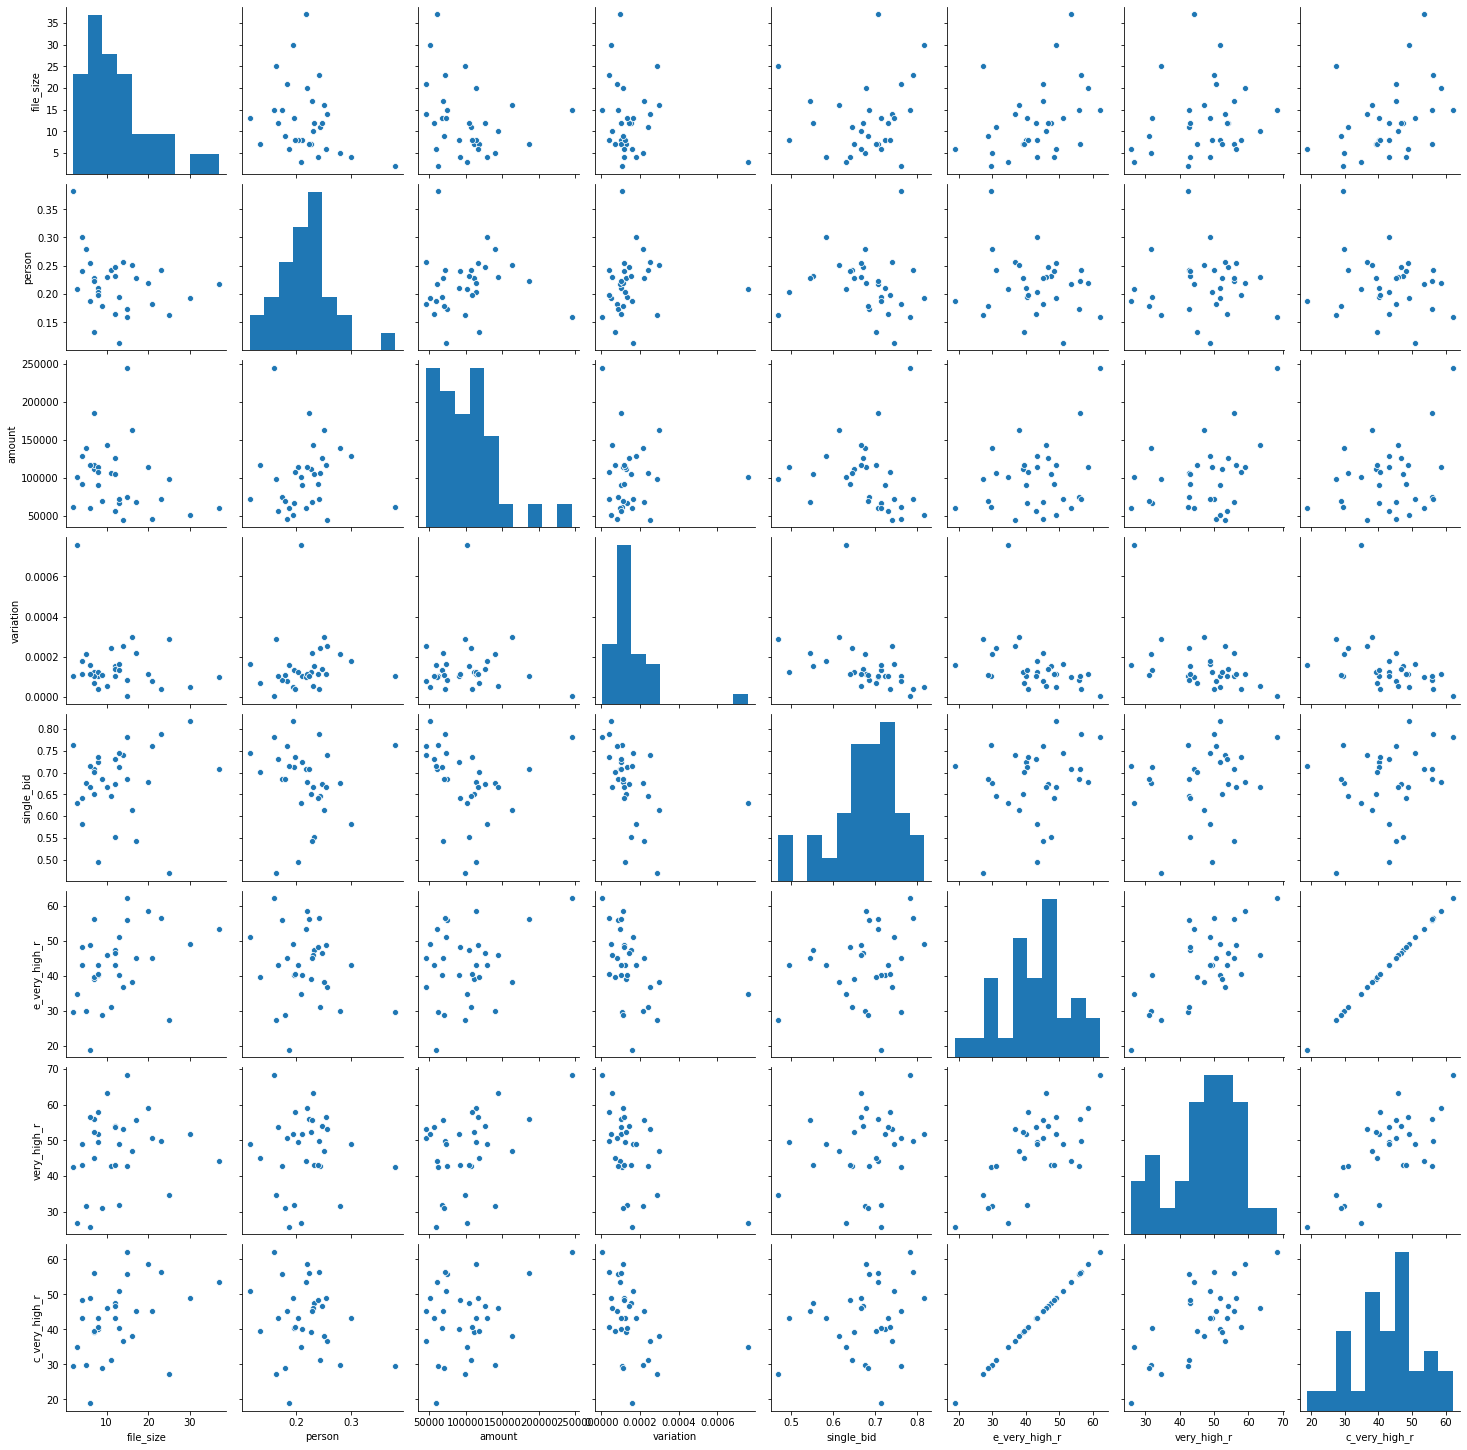

In [11]:
sns.pairplot(federal[some_cols])

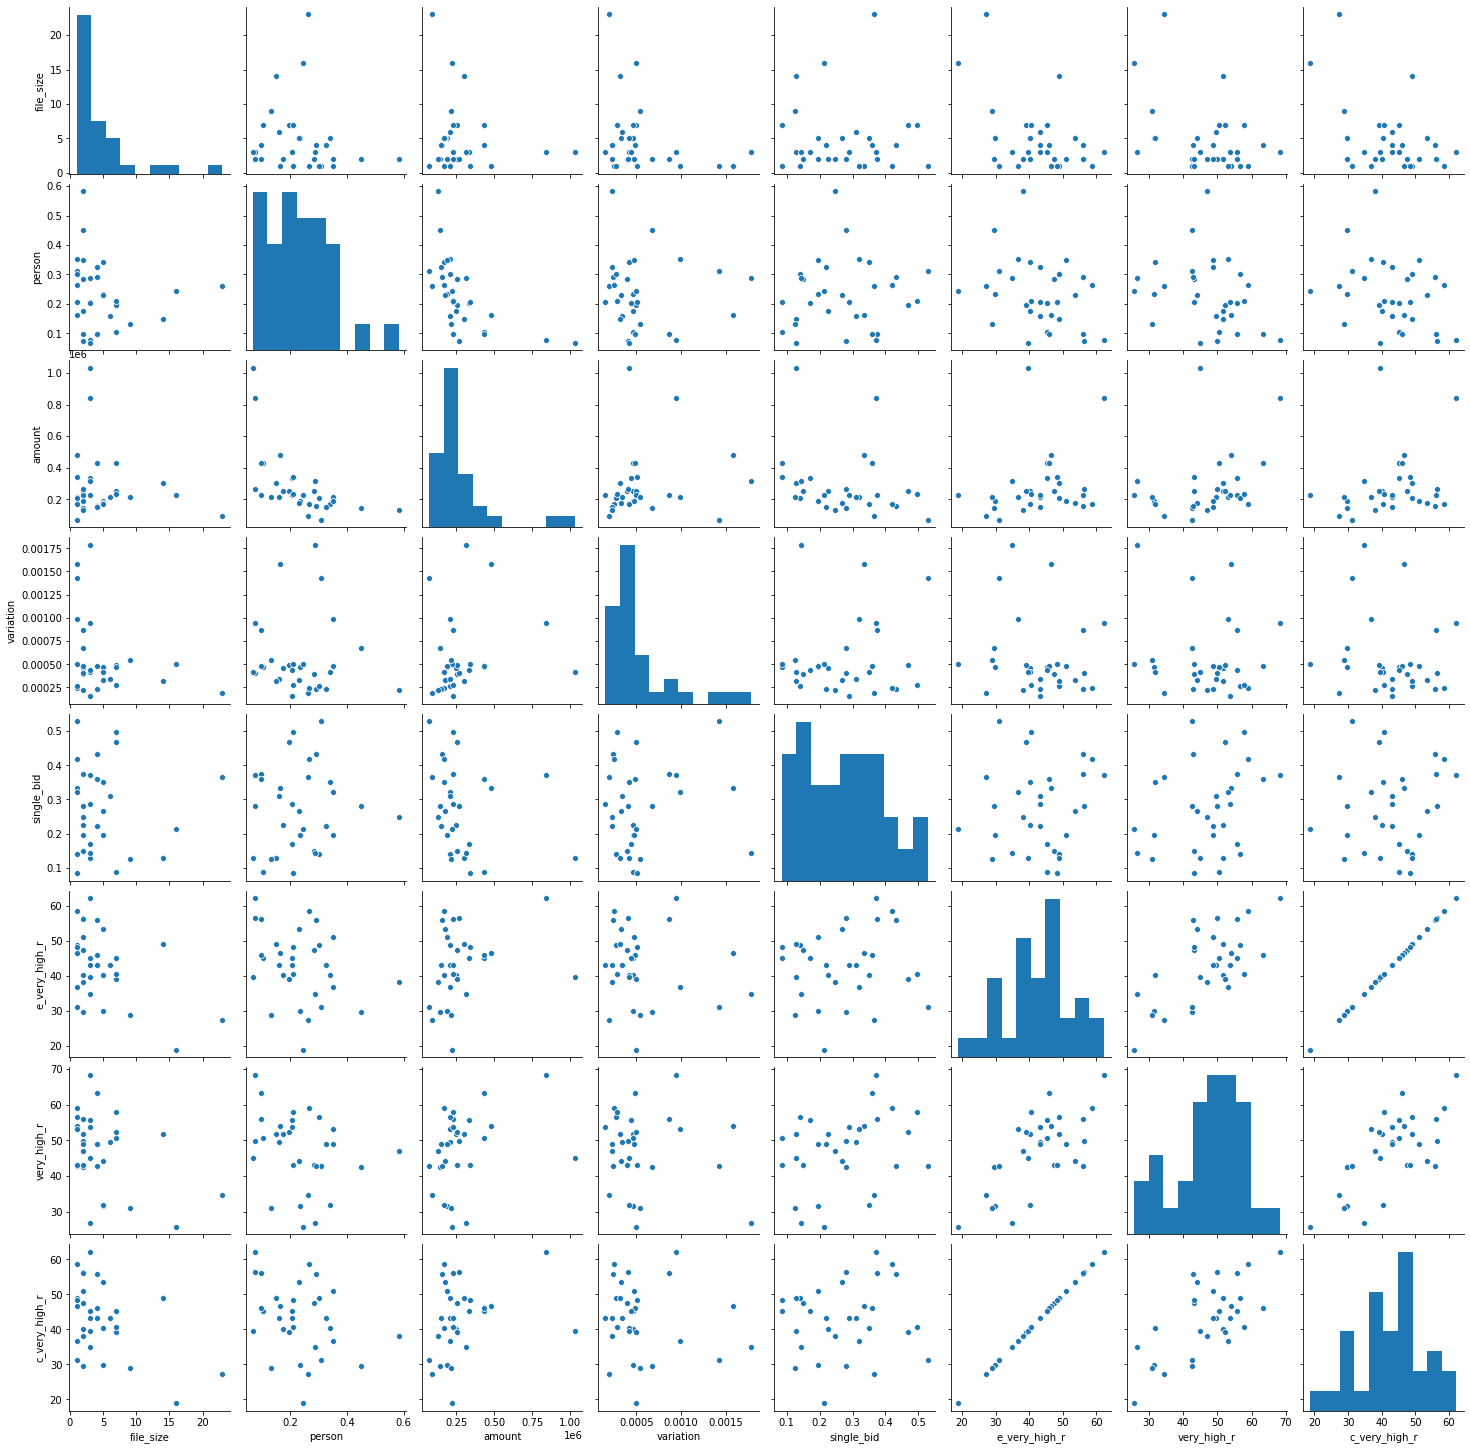

In [12]:
sns.pairplot(local[some_cols])